In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_csv('cleaned_data.csv')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

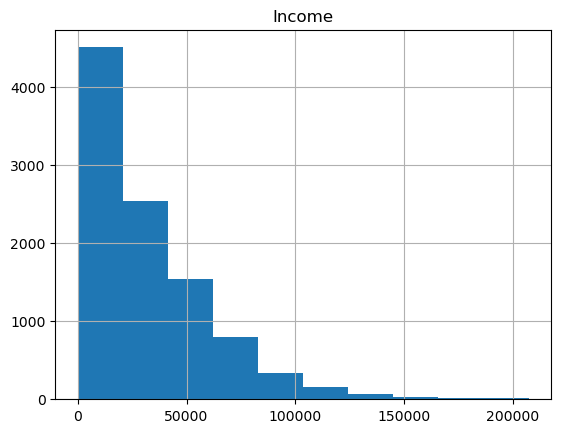

In [2]:
df.hist(['Income'])

<AxesSubplot:>

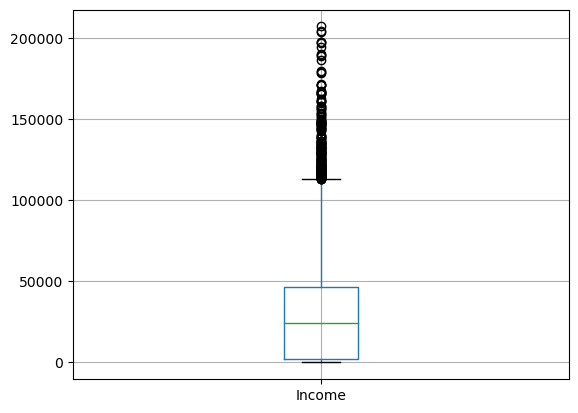

In [3]:
df.boxplot(['Income'])

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

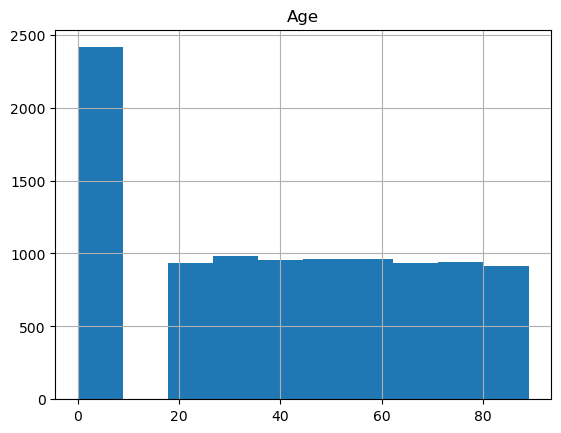

In [4]:
df.hist(['Age'])

<AxesSubplot:>

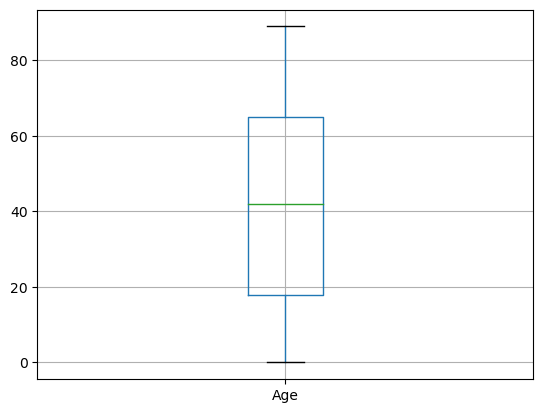

In [5]:
df.boxplot(["Age"])

In [6]:
readmission = df.groupby(by = 'ReAdmis').size()
readmission

ReAdmis
No     6331
Yes    3669
dtype: int64

<AxesSubplot:xlabel='ReAdmis'>

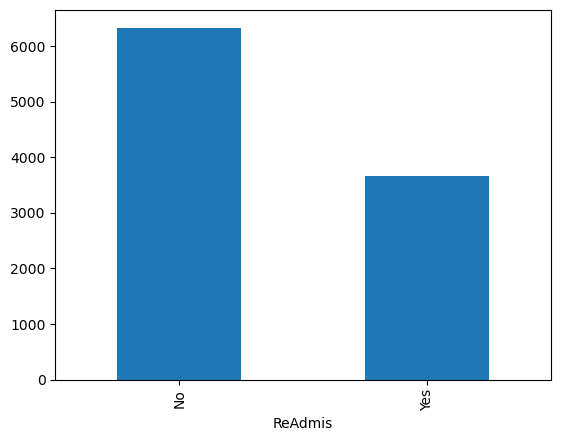

In [7]:
%matplotlib inline
readmission.plot.bar()

In [8]:
services = df.groupby(by = 'Services').size()
services

Services
Blood Work     5265
CT Scan        1225
Intravenous    3130
MRI             380
dtype: int64

<AxesSubplot:xlabel='Services'>

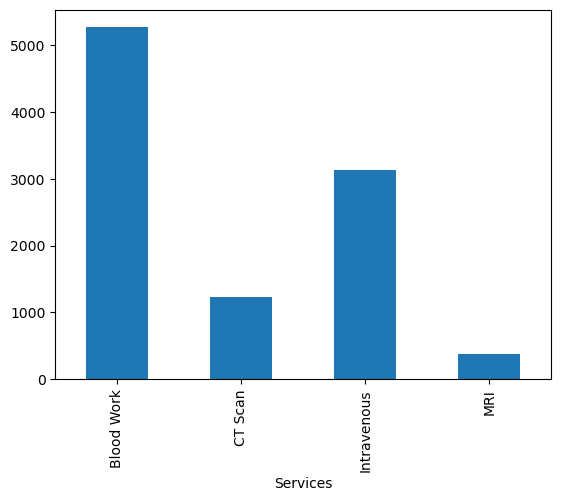

In [9]:
%matplotlib inline
services.plot.bar()

<AxesSubplot:xlabel='Income', ylabel='ReAdmis'>

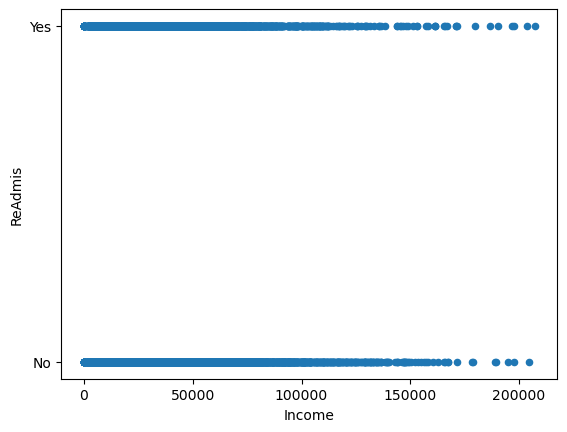

In [10]:
df.plot.scatter(x = 'Income', y = 'ReAdmis')

<AxesSubplot:xlabel='Age', ylabel='ReAdmis'>

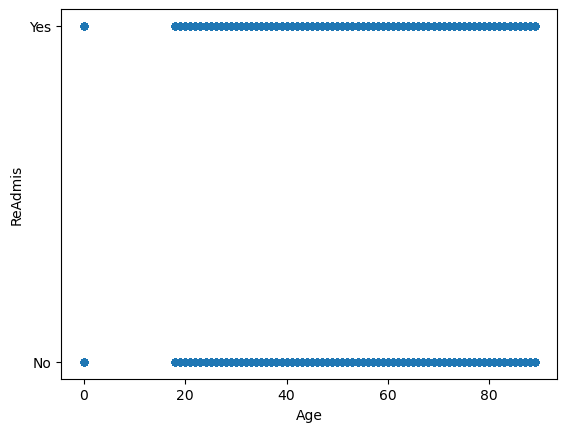

In [11]:
df.plot.scatter(x = 'Age', y = 'ReAdmis')

<AxesSubplot:xlabel='Income', ylabel='Services'>

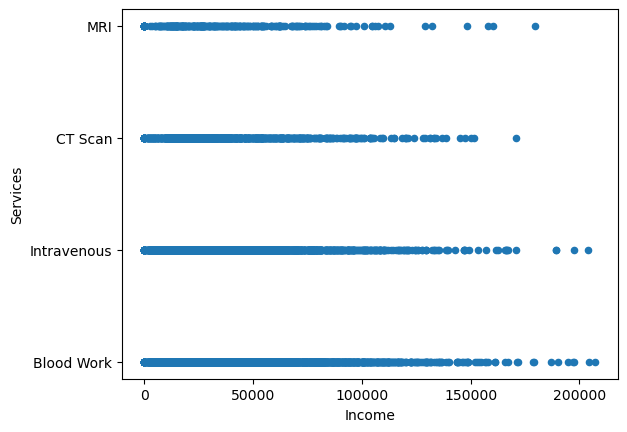

In [12]:
df.plot.scatter(x = 'Income', y = 'Services')

<AxesSubplot:xlabel='Age', ylabel='Services'>

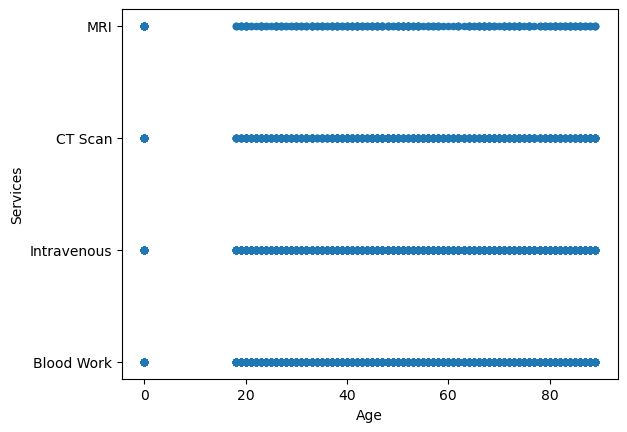

In [13]:
df.plot.scatter(x = 'Age', y = 'Services')

In [14]:
newdf = pd.crosstab(df['Complication_risk'], df['ReAdmis'])
print (newdf)

ReAdmis              No   Yes
Complication_risk            
High               2135  1223
Low                1343   782
Medium             2853  1664


In [15]:
observed = newdf.values
print('observed:\n', observed)

observed:
 [[2135 1223]
 [1343  782]
 [2853 1664]]


In [16]:
stat, p, dof, expected = chi2_contingency(observed)

In [17]:
print('dof=%d' % dof)
print (expected)

dof=2
[[2125.9498 1232.0502]
 [1345.3375  779.6625]
 [2859.7127 1657.2873]]


In [18]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print ('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
        print('Dependent (reject HO)')
else:
    print ('Independent (fail to reject HO)')

probability = 0.950, critical = 5.991, stat = 0.159
Independent (fail to reject HO)


In [19]:
alpha = 1.0 - prob
print ('significance =%.3f, p =%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject HO)')
else:
    print ('Independent (fail to reject HO)')

significance =0.050, p =0.924
Independent (fail to reject HO)
